# Unit 5 - Financial Planning

In [1]:
# Initial imports

# System libs.
import os
import requests
from dotenv import load_dotenv

# Data Manipulation libs.
import pandas as pd

# Api libs.
import alpaca_trade_api as tradeapi

# Import funcs.
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Parameters
num_sims = 1000

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
response_data_btc = requests.get(btc_url)
btc_json = response_data_btc.json()
btc_usd_price = btc_json["data"]["1"]["quotes"]["USD"]["price"]
btc_usd_price

43361.0

In [7]:
# Fetch current ETH price
# YOUR CODE HERE!
response_data_eth = requests.get(eth_url)
eth_json = response_data_eth.json()
eth_usd_price = eth_json["data"]["1027"]["quotes"]["USD"]["price"]
eth_usd_price

2964.33

In [8]:
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_usd_price 
my_eth_value = my_eth * eth_usd_price

In [9]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $52033.20
The current value of your 5.3 ETH is $15710.95


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_spy = 50
my_agg = 200
shares_data = {"shares": [200, 50]}

In [11]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-08-04", tz="America/New_York").isoformat()
# Set the tickers
tickers_stockbond = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stockbond = api.get_barset(
    tickers_stockbond,
    timeframe,
    limit=1000

).df

# Preview DataFrame
# YOUR CODE HERE!
df_stockbond.tail()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2021-08-02 00:00:00-04:00  116.36  116.68  116.3050  116.53  4669027.0   
2021-08-03 00:00:00-04:00  116.56  116.69  116.5306  116.58  3021828.0   
2021-08-04 00:00:00-04:00  116.77  116.83  116.3000  116.57  4578711.0   
2021-08-05 00:00:00-04:00  116.46  116.48  116.2800  116.32  3170931.0   
2021-08-06 00:00:00-04:00  115.93  116.02  115.7800  115.79  3125122.0   

                              SPY                                        
                             open      high     low   close      volume  
time                                                                     
2021-08-02 00:00:00-04:00  440.34  440.9300  437.21  437.58  54098311.0  
2021-08-03 00:00:00-04:00  438.44  441.2800  436.10  441.12  52043386.0  
2021-08-04 00:00:00-04:00  439.77  441.1243  438.73  439.01  40289514.0  
2021-08-05 00:00:00-04:00  440.22  441.8500  439.88  441.77  34903127.0  
2021-08-06 00:00:00-04:00  442.10  442.9400  441.80  442.52  40274051.0

In [13]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
spy_close_price = df_stockbond["SPY"]["close"][-1]
agg_close_price = df_stockbond["AGG"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current SPY closing price: ${spy_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")

Current SPY closing price: $442.52
Current AGG closing price: $115.79


In [14]:
# Compute the current value of shares
# YOUR CODE HERE!
shares_df = pd.DataFrame(shares_data, index= tickers_stockbond)
my_spy_value = spy_close_price * shares_df.loc["SPY"]["shares"]
my_agg_value = agg_close_price * shares_df.loc["AGG"]["shares"]

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22126.00
The current value of your 200 AGG shares is $23158.00


### Savings Health Analysis

In [15]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value
assets_data = {"amount":[crypto_value, shares_value]}
assets_tickers = ["crypto", "shares"]

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(assets_data, index= assets_tickers).round(2)

# Display savings DataFrame
df_savings

,amount
crypto,67744.15
shares,45284.00


<AxesSubplot:title={'center':'Proportion of Assets in Savings'}, ylabel='amount'>

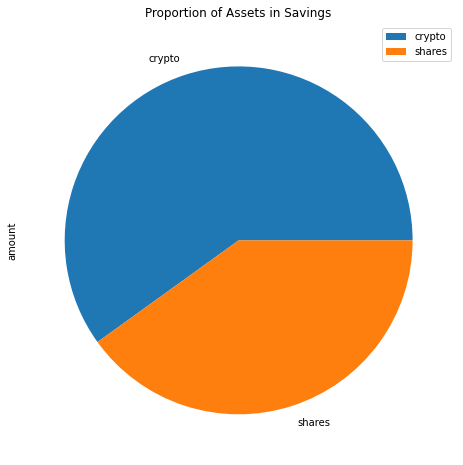

In [16]:
# Plot savings pie chart
# YOUR CODE HERE!
# Rachel's solution. Andrew mentioned "kind.plot or similar?" but wasn't sure. 
df_savings.plot.pie(y="amount", title="Proportion of Assets in Savings", figsize=(10,8))

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_value + shares_value
fund_diff = total_savings - emergency_fund
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations you have enough money your savings fund to cover emergencies")
elif total_savings == emergency_fund:
    print("Congratulations your savings are equal to your emergency fund")
else:
    print("You are $ {fund_diff} away from reaching your savings goal")

Congratulations you have enough money your savings fund to cover emergencies


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-08-04', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-04', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

ticker_fiveyear = api.get_barset(
    tickers_stockbond,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
ticker_fiveyear.tail()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-07-29 00:00:00-04:00  116.29  116.360  116.2250  116.28  5216456  439.83   
2021-07-30 00:00:00-04:00  116.36  116.485  116.3532  116.45  4859650  437.91   
2021-08-02 00:00:00-04:00  116.36  116.680  116.3050  116.53  4669027  440.34   
2021-08-03 00:00:00-04:00  116.56  116.690  116.5306  116.58  3021828  438.44   
2021-08-04 00:00:00-04:00  116.77  116.830  116.3000  116.57  4578711  439.77   

                                                               
                               high     low   close    volume  
time                                                           
2021-07-29 00:00:00-04:00  441.8000  439.81  440.67  40930880  
2021-07-30 00:00:00-04:00  440.0600  437.77  438.49  56594282  
2021-08-02 00:00:00-04:00  440.9300  437.21  437.58  54098311  
2021-08-03 00:00:00-04:00  441.2800  436.10  441.12  52043386  
2021-08-04 00:00:00-04:00  441.1243  438.73  439.01  40289514

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = ticker_fiveyear,
    weights = [.5,.5],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004992,0.997796,0.994074,0.995491,1.000317,0.996030,0.991939,0.993812,1.001175,1.002527,...,0.993181,1.008439,1.005258,1.004060,1.012034,0.994549,1.012721,0.994149,0.992367,0.997304
2,1.008206,1.000201,0.992214,0.992831,0.998079,0.999878,0.996803,0.997532,1.001291,0.994170,...,0.997826,0.991295,0.997380,1.005443,0.992060,0.988482,1.010697,0.992755,1.002751,0.998293
3,1.015660,0.991964,0.994221,0.979368,1.005128,0.990431,1.010234,0.994275,1.011240,0.984558,...,0.996520,0.996987,1.006497,1.014592,0.989316,0.990225,1.014468,0.993351,1.007708,1.012028
4,1.022198,1.000119,0.987166,0.980477,1.000968,0.998487,1.004990,1.005126,1.007017,0.986449,...,1.011094,0.994075,1.011787,1.015977,0.988655,0.994409,1.008158,0.985479,1.008130,1.003734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,18.596835,2.739348,13.306126,10.566571,11.627739,12.812124,24.556328,4.326923,17.954651,12.111061,...,58.231367,13.360722,13.993271,47.382917,10.529153,14.856031,10.559402,5.548143,10.479806,16.742793
7557,18.377839,2.736596,13.480983,10.584934,11.607558,12.952719,24.413674,4.306620,18.081734,12.064673,...,58.724426,13.397243,13.939313,47.650232,10.426366,14.753977,10.523036,5.557183,10.472758,16.832791
7558,18.438424,2.772223,13.374746,10.571579,11.657700,12.867739,24.397248,4.272677,17.891357,12.174422,...,58.296754,13.438885,13.985123,47.844424,10.439968,14.779855,10.556639,5.518960,10.509297,16.855219
7559,18.259421,2.756705,13.347747,10.605356,11.670188,12.919807,24.450880,4.257995,17.929876,12.212779,...,58.930849,13.466258,14.005838,47.558550,10.498881,14.824973,10.579252,5.497522,10.494477,17.017062


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of AGG and SPY Stocks Over the Next 30 years'}>

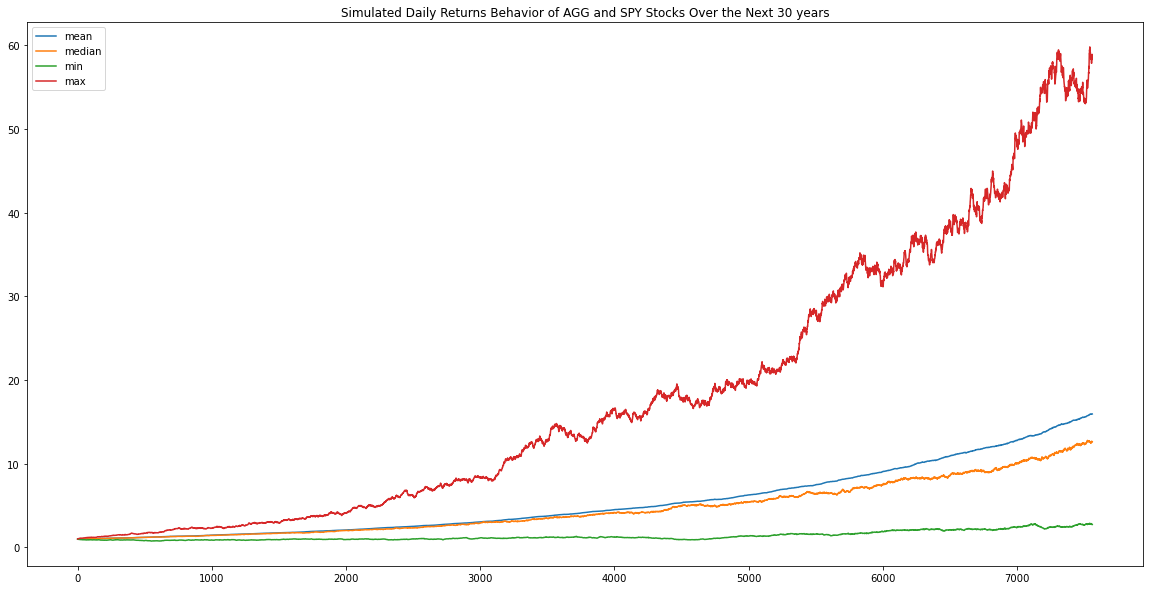

In [23]:
# Plot simulation outcomes
# YOUR CODE HERE!
# Compute Summary Statistics from MCS
simulated_returns_data = {
    "mean": list(MC_thirtyyear.simulated_return.mean(axis=1)),
    "median": list(MC_thirtyyear.simulated_return.median(axis=1)),
    "min": list(MC_thirtyyear.simulated_return.min(axis=1)),
    "max": list(MC_thirtyyear.simulated_return.max(axis=1))
}
# Summary Statistics into DataFrame
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Plot simulation to visualize trajectory of Tickers for next 30 years
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of AGG and SPY Stocks Over the Next 30 years", figsize=(20,10))


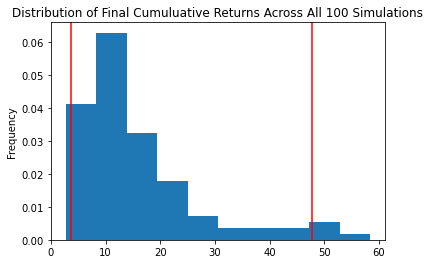

In [24]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
tbl

count           100.000000
mean             15.943194
std              11.286734
min               2.742665
25%               8.775616
50%              12.609703
75%              18.926722
max              58.370349
95% CI Lower      3.764880
95% CI Upper     47.801022
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75297.61 and $956020.44


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:0.0f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $112946.41 and $1434030.66


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns 
# YOUR CODE HERE!
# df for 5y sim for 40% AGG and 60% SPY (tickers_stockbond = ["AGG", "SPY"]) 
MC_fiveyear = MCSimulation(
    portfolio_data = ticker_fiveyear,
    weights = [.4,.6],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
# Display sample data
MC_fiveyear.portfolio_data.head()

AGG                                     \
                             open     high     low    close   volume   
time                                                                   
2017-08-15 00:00:00-04:00  109.56  109.715  109.56  109.650  1585338   
2017-08-16 00:00:00-04:00  109.54  109.930  109.54  109.840  1570272   
2017-08-17 00:00:00-04:00  109.83  110.020  109.78  110.010  2033497   
2017-08-18 00:00:00-04:00  110.05  110.140  109.89  109.965  1453298   
2017-08-21 00:00:00-04:00  110.01  110.090  109.97  110.030  1606116   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2017-08-15 00:00:00-04:00          NaN  246.98  247.000  246.16  246.53   
2017-08-16 00:00:00-04:00     0.001733  247.11  247.570  246.45  246.92   
2017-08-17 00:00:00-04:00     0.001548  246.24  246.600  243.10  243.13   
2017-08-18 00:00:00-04:00    -0.000409  242.90  244.189  242.20  242.69   
2017-08-21 00:00:00-04:00     0.000591  242.64  243.200  241.83  242.93   

                                                  
                             volume daily_return  
time                                              
2017-08-15 00:00:00-04:00  35274867          NaN  
2017-08-16 00:00:00-04:00  44955596     0.001582  
2017-08-17 00:00:00-04:00  89435117    -0.015349  
2017-08-18 00:00:00-04:00  85934699    -0.001810  
2017-08-21 00:00:00-04:00  47802190     0.000989

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993681,1.002583,1.016332,0.994146,0.995388,1.000689,1.000124,1.000907,1.014197,0.999567,...,0.997789,1.014499,1.004155,1.003429,1.000676,0.994375,0.990098,0.994448,1.008038,1.005079
2,0.987709,0.999663,1.027643,0.975642,0.998098,1.009339,1.010438,1.002912,1.011376,0.990426,...,1.001792,1.020217,1.005782,1.006333,0.996258,1.000111,0.988823,0.999084,1.011408,1.000081
3,0.999033,1.002730,1.017570,0.977669,0.998303,1.001352,0.999901,0.996295,1.014842,0.978521,...,0.994042,1.009120,0.984741,1.013080,1.007527,1.004613,0.998810,0.993230,0.999668,0.997292
4,1.012506,0.998494,1.014176,0.962917,1.002818,1.004890,0.992485,0.998922,1.032428,0.981518,...,0.996995,1.007814,0.987978,1.014898,1.010945,1.007636,0.999920,1.004331,0.998332,0.991513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.261213,1.735402,1.225167,1.416749,1.558088,0.832942,2.073371,0.923499,1.168360,1.659544,...,2.007843,1.712166,1.509147,2.029861,1.489265,1.686607,1.435741,2.315998,1.412126,1.445099
1257,1.269232,1.714561,1.226265,1.423988,1.564333,0.824556,2.038166,0.932241,1.175332,1.650895,...,2.022734,1.694389,1.517349,2.039566,1.502365,1.702045,1.434103,2.324303,1.429325,1.421190
1258,1.280976,1.695766,1.231667,1.411606,1.564669,0.836005,2.046058,0.935176,1.162014,1.650623,...,2.010335,1.701461,1.506307,2.034789,1.499071,1.694948,1.442473,2.320735,1.450205,1.428508
1259,1.285415,1.697484,1.232579,1.421770,1.570312,0.837822,2.075185,0.939951,1.161621,1.667787,...,1.987050,1.677843,1.503667,2.055592,1.505114,1.696977,1.440762,2.347480,1.468229,1.421989


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

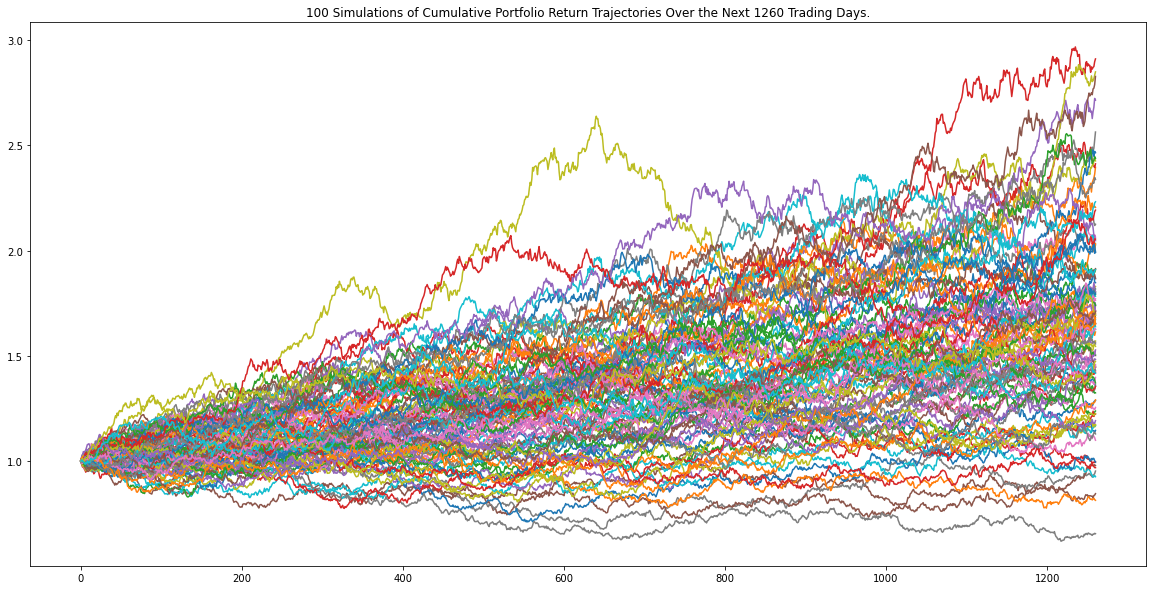

In [30]:
# Plot simulation outcomes
# YOUR CODE HERE!
# I Needed to update MCForecastTools to include figsize parameter for bigger chart coz the little default one was tiny af
MC_fiveyear.plot_simulation()

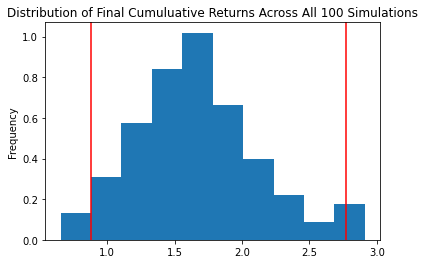

In [31]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_fiveyear.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
tbl_five

count           100.000000
mean              1.664331
std               0.465039
min               0.654447
25%               1.359683
50%               1.653862
75%               1.879164
max               2.910958
95% CI Lower      0.882977
95% CI Upper      2.774343
Name: 1260, dtype: float64

In [33]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_twentyk = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*20000,2)
ci_upper_five = round(tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_twentyk} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $75297.61 and $956020.44


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
# df for 10y sim for 40% AGG and 60% SPY (tickers_stockbond = ["AGG", "SPY"])
MC_tenyear = MCSimulation(
    portfolio_data = ticker_fiveyear,
    weights = [.4,.6],
    num_simulation = num_sims,
    num_trading_days = 252*10
)
# Display sample data
MC_tenyear.portfolio_data.tail()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2021-07-29 00:00:00-04:00  116.29  116.360  116.2250  116.28  5216456   
2021-07-30 00:00:00-04:00  116.36  116.485  116.3532  116.45  4859650   
2021-08-02 00:00:00-04:00  116.36  116.680  116.3050  116.53  4669027   
2021-08-03 00:00:00-04:00  116.56  116.690  116.5306  116.58  3021828   
2021-08-04 00:00:00-04:00  116.77  116.830  116.3000  116.57  4578711   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2021-07-29 00:00:00-04:00    -0.001717  439.83  441.8000  439.81  440.67   
2021-07-30 00:00:00-04:00     0.001462  437.91  440.0600  437.77  438.49   
2021-08-02 00:00:00-04:00     0.000687  440.34  440.9300  437.21  437.58   
2021-08-03 00:00:00-04:00     0.000429  438.44  441.2800  436.10  441.12   
2021-08-04 00:00:00-04:00    -0.000086  439.77  441.1243  438.73  439.01   

                                                  
                             volume daily_return  
time                                              
2021-07-29 00:00:00-04:00  40930880     0.004170  
2021-07-30 00:00:00-04:00  56594282    -0.004947  
2021-08-02 00:00:00-04:00  54098311    -0.002075  
2021-08-03 00:00:00-04:00  52043386     0.008090  
2021-08-04 00:00:00-04:00  40289514    -0.004783

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997921,0.995180,0.996226,0.988439,0.992442,0.998142,0.999429,0.996729,1.010106,1.006908,...,1.008395,0.995799,1.002621,0.995448,1.001912,1.009740,1.012325,1.008538,0.987890,0.995530
2,1.009899,1.012269,1.003824,0.990241,0.986363,1.003375,0.989199,0.983377,1.023054,0.989885,...,1.017362,1.000898,0.996136,0.984551,1.003247,1.013466,1.019611,1.005435,0.993165,0.991459
3,1.015814,1.011995,1.016210,0.996780,0.983967,1.020908,1.002112,0.984469,1.030582,0.999585,...,1.004102,1.013195,1.009206,0.977596,0.997241,1.013253,1.025678,1.004832,0.988440,1.005249
4,1.014064,1.012362,1.014647,1.009414,0.976681,1.010649,1.010738,0.992339,1.028222,1.005642,...,1.013503,1.016743,1.018813,0.982579,0.991187,1.022853,1.030341,1.000504,0.994275,1.003103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.919725,3.315784,2.295668,4.793373,4.224533,4.354005,1.319146,2.410045,1.965263,2.352352,...,4.181205,1.401889,2.528835,2.213663,5.856020,5.484201,2.668749,2.076403,1.954371,1.678794
2517,3.907613,3.339466,2.261336,4.823654,4.214785,4.333859,1.330776,2.386964,1.979147,2.360265,...,4.135472,1.381854,2.517658,2.229014,5.929966,5.554969,2.666241,2.066038,1.972942,1.669673
2518,3.893120,3.371434,2.252065,4.780369,4.227179,4.352856,1.333808,2.425301,1.991489,2.340186,...,4.121775,1.376983,2.514533,2.242893,5.925083,5.540566,2.716589,2.046802,1.969364,1.680533
2519,3.841057,3.346763,2.243777,4.783724,4.273129,4.394996,1.327188,2.414068,1.978537,2.348431,...,4.167220,1.373771,2.517001,2.224084,5.933628,5.526256,2.729109,2.039352,1.978672,1.703818


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

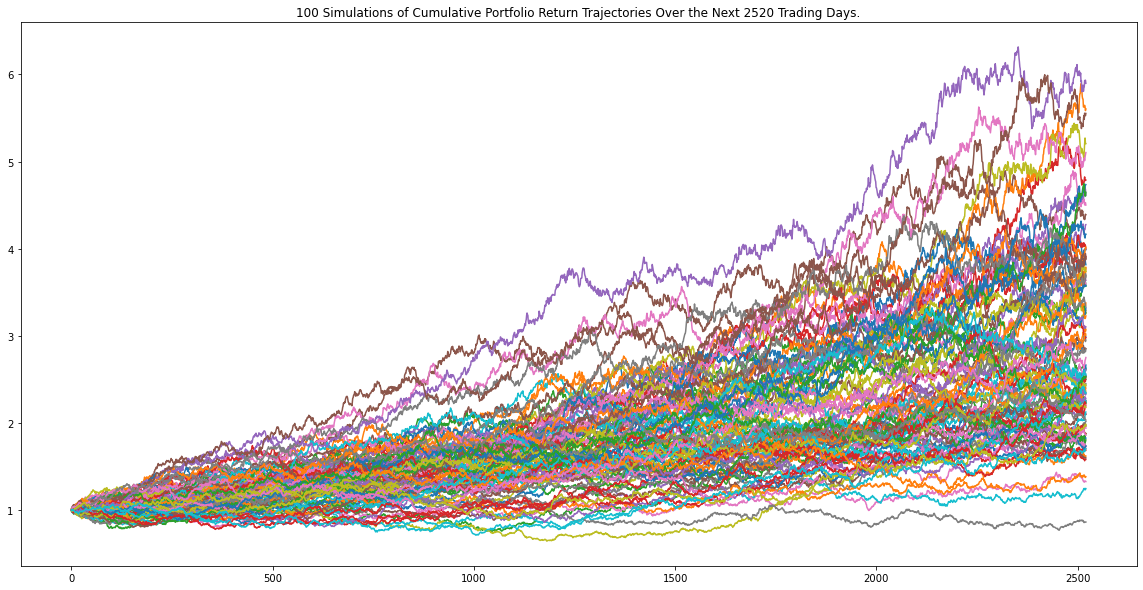

In [36]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_tenyear.plot_simulation()

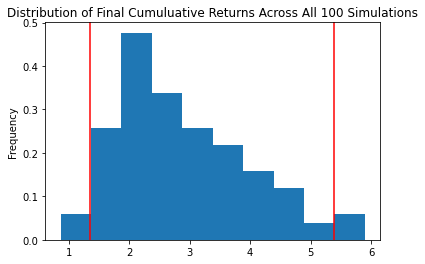

In [37]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten = MC_tenyear.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_tenyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
tbl_ten

count           100.000000
mean              2.899337
std               1.075485
min               0.861941
25%               2.103095
50%               2.585762
75%               3.680257
max               5.897619
95% CI Lower      1.353351
95% CI Upper      5.387071
Name: 2520, dtype: float64

In [39]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_hundyk = 100000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(tbl[8]*20000,2)
ci_upper_ten = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_hundyk} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $75297.61 and $956020.44
